<font size="+3"><strong>Analysis of Housing in Brazil </strong></font>

<div class="alert alert-block alert-warning">
    <b>Note:</b> This project is my (Peace Peter) submission for the Worldquant Applied Data Science Lab program. 
</div>

In this project, I worked with a dataset of homes for sale in Brazil. The goal is to determine if there are regional differences in its real estate market. Also, I considered southern Brazil to see if there is a relationship between home size and price.

Questions <br>
1) Is there a relationship between location and price? <br>
2) Is there a relationship between home size and price?

**Importing libraries**

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
#import plotly.express as px

**Importing the data**

In [19]:
brasil_1 = pd.read_excel(r'C:\Users\PEACE\Desktop\yyy\Data Bank\Worldquant University\brasil-real-estate-1.xlsx')

# viewing sample data

brasil_1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


In [20]:
brasil_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 7 columns):
Unnamed: 0                 12834 non-null int64
property_type              12834 non-null object
place_with_parent_names    12834 non-null object
region                     12834 non-null object
lat-lon                    11551 non-null object
area_m2                    12834 non-null int64
price_usd                  12834 non-null object
dtypes: int64(2), object(5)
memory usage: 702.0+ KB


**<font size="+1">DATA CLEANING AND TRANSFORMATION</font>**

**Removing all empty rows from the dataframe**

In [21]:
brasil_1.dropna(inplace=True)

**Splittting the `lat-lon` column into two separate columns and changing the data type for the two new columns to float**

In [22]:
brasil_1[["lat", "lon"]] = brasil_1["lat-lon"].str.split(",", expand=True).astype(float)


#Checking the results
brasil_1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",-9.644305,-35.708814
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",-9.643093,-35.704840
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",-9.622703,-35.729795
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",-9.622837,-35.719556
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",-9.654955,-35.700227


**Using the `"place_with_parent_names"` column to create a `"state"` column for `brasil_1`**

In [23]:
brasil_1["state"] = brasil_1["place_with_parent_names"].str.split("|", expand=True)[2]


#Checking the results
brasil_1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",-9.644305,-35.708814,Alagoas
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",-9.643093,-35.704840,Alagoas
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",-9.622703,-35.729795,Alagoas
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",-9.622837,-35.719556,Alagoas
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",-9.654955,-35.700227,Alagoas


**Deleting the `"lat-lon"` and `"place_with_parent_names columns"`**

In [24]:
brasil_1.drop(columns=["place_with_parent_names", "lat-lon"], inplace=True)


#Checking the results
brasil_1.head()

,Unnamed: 0,property_type,region,area_m2,price_usd,lat,lon,state
0,1,apartment,Northeast,110,"$187,230.85",-9.644305,-35.708814,Alagoas
1,2,apartment,Northeast,65,"$81,133.37",-9.643093,-35.704840,Alagoas
2,3,house,Northeast,211,"$154,465.45",-9.622703,-35.729795,Alagoas
3,4,apartment,Northeast,99,"$146,013.20",-9.622837,-35.719556,Alagoas
4,5,apartment,Northeast,55,"$101,416.71",-9.654955,-35.700227,Alagoas


**Transforming the `"price_usd"` column of `brasil_1` so that all the values are floating point numbers instead of strings** 

In [25]:
brasil_1["price_usd"] = (brasil_1["price_usd"].str.replace("$", "", regex=False).str.replace(",", "").astype(float))


#Checking the results
brasil_1.head()

,Unnamed: 0,property_type,region,area_m2,price_usd,lat,lon,state
0,1,apartment,Northeast,110,187230.85,-9.644305,-35.708814,Alagoas
1,2,apartment,Northeast,65,81133.37,-9.643093,-35.704840,Alagoas
2,3,house,Northeast,211,154465.45,-9.622703,-35.729795,Alagoas
3,4,apartment,Northeast,99,146013.20,-9.622837,-35.719556,Alagoas
4,5,apartment,Northeast,55,101416.71,-9.654955,-35.700227,Alagoas


**Importing second data**

In [26]:
brasil_2 = pd.read_excel(r'C:\Users\PEACE\Desktop\yyy\Data Bank\Worldquant University\brasil-real-estate-2.xlsx')


# viewing sample data

brasil_2.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_brl
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [27]:
brasil_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 8 columns):
Unnamed: 0       12833 non-null int64
property_type    12833 non-null object
state            12833 non-null object
region           12833 non-null object
lat              12833 non-null float64
lon              12833 non-null float64
area_m2          11293 non-null float64
price_brl        12833 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 802.2+ KB


**Creating a new column 'price_usd' from the 'price_brl' column**

In [28]:
brasil_2["price_usd"] = brasil_2["price_brl"]/3.19

brasil_2.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.463950
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.786834
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.799373
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.786834
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.097179


**Removing the price_brl column and empty rows**

In [29]:
brasil_2.dropna(inplace=True)
brasil_2 = brasil_2.drop("price_brl", axis="columns")

brasil_2.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_usd
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179


**Concatenating brasil_1 and brasil_2 to create a new dataframe called brasil**

In [30]:
brasil = pd.concat([brasil_1, brasil_2])

print("brasil shape:", brasil.shape)

brasil shape: (22844, 8)


C:\Users\PEACE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


**<font size="+1">DATA EXPLORATION</font>**

**Creating a scatter_mapbox showing the location of the properties in brasil.**

fig = px.scatter_mapbox(
    brasil,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

**Using the describe method to create a dataframe summary_stats with the summary statistics for the "area_m2" and "price_usd" columns.**

In [31]:
summary_stats = brasil[["area_m2", "price_usd"]].describe
summary_stats

<bound method NDFrame.describe of        area_m2      price_usd
0        110.0  187230.850000
1         65.0   81133.370000
2        211.0  154465.450000
3         99.0  146013.200000
4         55.0  101416.710000
...        ...            ...
12827    180.0  131414.921630
12828    250.0  134543.852665
12829     55.0   79121.880878
12830     57.0  100125.655172
12832     70.0   90738.874608

[22844 rows x 2 columns]>

**Creating a histogram of "price_usd" to check distribution of home prices**

Text(0.5, 1.0, 'Distribution of Home Prices')

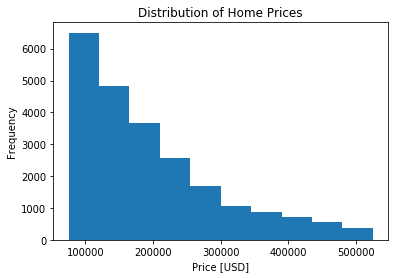

In [33]:
plt.hist(brasil["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices")

**Grouping the properties in brasil by price**

In [34]:
mean_price_by_region = brasil.groupby("region")["price_usd"].mean()
mean_price_by_region.sort_values(ascending = True)

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

Text(0.5, 1.0, 'Mean Home Price by Region')

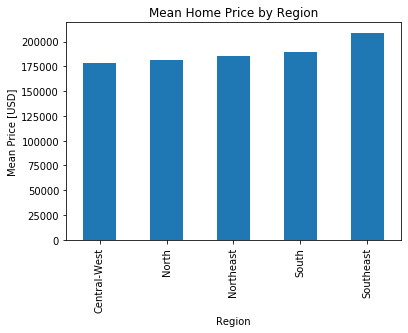

In [35]:
mean_price_by_region.plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Mean Price [USD]")
plt.title("Mean Home Price by Region")

In [36]:
mean_price_by_region.values

array([178596.28366258, 181308.95820749, 185422.98544079, 189012.34526518,
       208996.76277762])

## Research Question 2

Is there a relationship between location and price?

Does the location of a home affects its price (especially if it’s
in Southern Brazil), but what about home size? Does the size of a house influence price?

In [37]:
brasil_south = brasil[brasil["region"] == "South"]

brasil_south.head()

,Unnamed: 0,area_m2,lat,lon,price_usd,property_type,region,state
9304,9305,127.0,-25.455704,-49.292918,296448.85,apartment,South,Paraná
9305,9306,104.0,-25.455704,-49.292918,219996.25,apartment,South,Paraná
9306,9307,100.0,-25.460236,-49.293812,194210.50,apartment,South,Paraná
9307,9308,77.0,-25.460236,-49.293812,149252.94,apartment,South,Paraná
9308,9309,73.0,-25.460236,-49.293812,144167.75,apartment,South,Paraná


In [38]:
homes_by_state = brasil_south["state"].value_counts()
homes_by_state

Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: state, dtype: int64

**Creating a dictionary south_states_corr, where the keys are the names of the three states in the "South" region of Brazil, and their associated values are the correlation coefficient between "area_m2" and "price_usd" in that state.**

There's a possibility that there is some kind of relationship between the price of a property and the area it occupies, so the Series.corr method will be used to figure it out. 

In [39]:
rio_state = brasil_south[brasil_south["state"] == "Rio Grande do Sul"]
santa_state = brasil_south[brasil_south["state"] == "Santa Catarina"]
parana_state = brasil_south[brasil_south["state"] == "Paraná"]


rarea_m2 = rio_state["area_m2"]
rprice_usd = rio_state["price_usd"]
r_correlation = rarea_m2.corr(rprice_usd)

sarea_m2 = santa_state["area_m2"]
sprice_usd = santa_state["price_usd"]
s_correlation = sarea_m2.corr(sprice_usd)

parea_m2 = parana_state["area_m2"]
pprice_usd = parana_state["price_usd"]
p_correlation = parea_m2.corr(pprice_usd)

south_states_corr = {
"Rio Grande do Sul": r_correlation,
"Santa Catarina": s_correlation,
"Paraná": p_correlation,
}

south_states_corr


{'Rio Grande do Sul': 0.5773267433717686,
 'Santa Catarina': 0.506812177636678,
 'Paraná': 0.5436659935502657}

**Creating a scatter plot showing price vs. area for the state in brasil_south that has the largest number of properties.**

In [40]:
rio_state.head()

,Unnamed: 0,area_m2,lat,lon,price_usd,property_type,region,state
743,744,188.0,-30.027105,-51.130470,115770.288401,house,South,Rio Grande do Sul
745,746,65.0,-30.039816,-51.223164,123430.141066,apartment,South,Rio Grande do Sul
746,747,142.0,-29.696850,-53.858382,185145.222571,apartment,South,Rio Grande do Sul
748,749,151.0,-30.033820,-51.198596,256571.996865,apartment,South,Rio Grande do Sul
750,751,68.0,-30.034061,-51.135494,75957.012539,apartment,South,Rio Grande do Sul


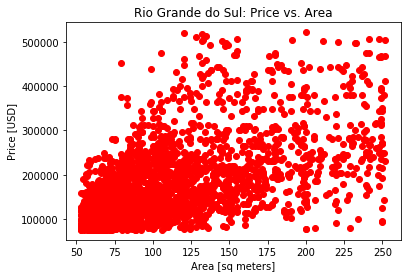

In [41]:
#plt.scatter(brasil_south["area_m2"], brasil_south["price_usd"], color="r")

rio_state = brasil_south[brasil_south["state"] == "Rio Grande do Sul"]

plt.scatter(rio_state["area_m2"], rio_state["price_usd"], color="r")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Rio Grande do Sul: Price vs. Area");